# Algorithm Comparison

## Things to note:
1. Consistent comparison: ensure all algorithms are evaluated on the *same data*, in the *same way*!
2. Use resampling methods, like *cross validation*.
3. Use multiple ways for looking at the estimated accuracy (visualise various metrics).

## Classification

We are going to user the Pima Indians dataset (from Lecture 6):

https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

filename = "../datasets/pima_indians_diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, names=names)

## Create the 10 folds.
array = df.values
X = array[:,0:8]
Y = array[:,8]

### We are going to compare a set of algorithms:
1. Logistic Regression
2. Linear Discriminant Analysis
3. k-Nearest Neighbors
4. Decision Trees
5. Naive Bayes

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))

In [8]:
# The scoring function to use
scoring = 'accuracy'

In [9]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.769515 (+/- 0.048411)
LDA: 0.773462 (+/- 0.051592)
kNN: 0.726555 (+/- 0.061821)
 DT: 0.693865 (+/- 0.062125)
 NB: 0.755178 (+/- 0.042766)


### Lets plot results

<IPython.core.display.Javascript object>


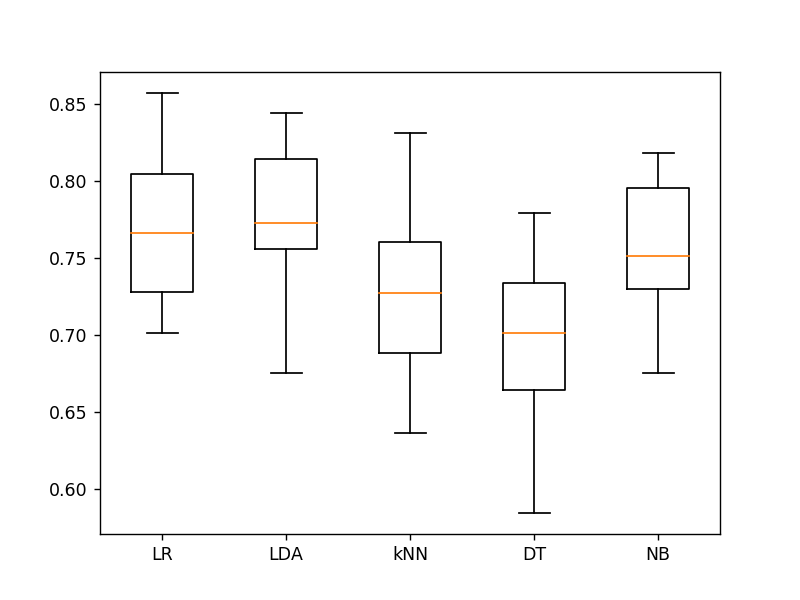

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

## Regression
We are going to use the "Boston House Price" dataset:

http://lib.stat.cmu.edu/datasets/boston

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

https://www.kaggle.com/vikrishnan/boston-house-prices

There are 14 attributes in each case of the dataset. They are:

 * CRIM - per capita crime rate by town
 * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS - proportion of non-retail business acres per town.
 * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 * NOX - nitric oxides concentration (parts per 10 million)
 * RM - average number of rooms per dwelling
 * AGE - proportion of owner-occupied units built prior to 1940
 * DIS - weighted distances to five Boston employment centres
 * RAD - index of accessibility to radial highways
 * TAX - full-value property-tax rate per \$10,000
 * PTRATIO - pupil-teacher ratio by town
 * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT - % lower status of the population
 * MEDV - Median value of owner-occupied homes in $1000's

In [16]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
boston = load_boston()

df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'].tolist() + ['target'])
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
array = df.values
X = array[:,0:13]
Y = array[:,13]

### We are going to compare a set of algorithms:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. ElasticNet Regression
5. k-Nearest Neighbors
6. Regression Trees

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))

In [22]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [23]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -34.705256 (+/- 45.573999)
     RIDGE: -34.078246 (+/- 45.900034)
     LASSO: -34.464085 (+/- 27.888592)
   ELASTIC: -31.164574 (+/- 22.708675)
       kNN: -107.286839 (+/- 79.839529)
        DT: -39.416638 (+/- 30.973664)


<IPython.core.display.Javascript object>


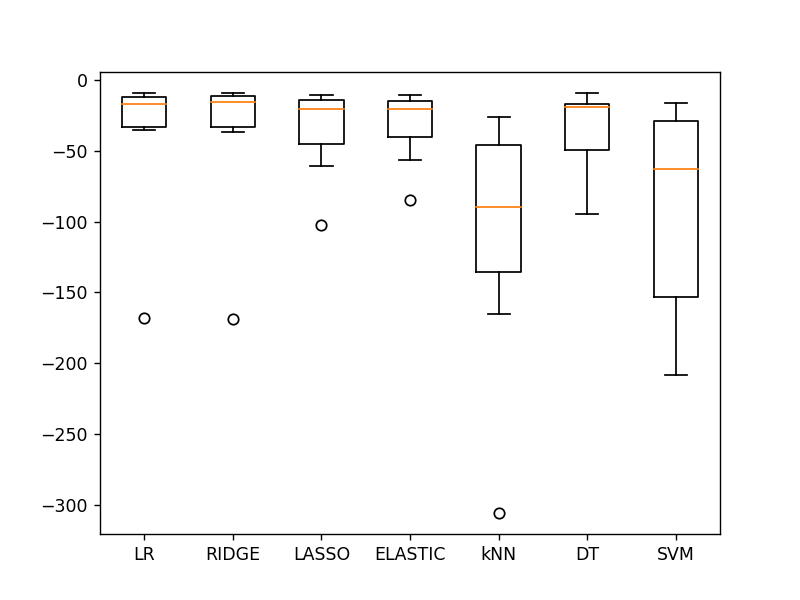

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()